In [6]:
!pip install spacy networkx pyvis

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

## Loading model

In [7]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 655.4 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 1.3 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.5/12.8 MB 1.7 MB/s eta 0:00:08
     - -------------------------------------- 0.6/12.8 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.0 MB

In [2]:
nlp = spacy.load("en_core_web_sm")

## loading books

In [3]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [4]:
all_books

[<DirEntry '01 The Lightning Thief.txt'>,
 <DirEntry '02. The Sea of Monsters.txt'>,
 <DirEntry '03. the-titans-curse.txt'>,
 <DirEntry '04. the-battle-of-the-labyrinth.txt'>,
 <DirEntry '05. the_last_olympian.txt'>,
 <DirEntry '06. The Lost Hero.txt'>,
 <DirEntry '07. The Son of Neptune.txt'>,
 <DirEntry '08. The Mark of Athena.txt'>,
 <DirEntry '09. The House of Hades.txt'>,
 <DirEntry '10. The Blood of Olympus.txt'>]

In [5]:
book = all_books[0]
book_text = open(book, encoding='utf-8').read()
book_doc = nlp(book_text)

In [6]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Get list of characters in each sentence of book

In [7]:
# dataframe containing list of character names
df = pd.read_csv('characters.csv')

In [8]:
df

,character,character_firstname
0,Aaron,Aaron
1,Abdel Fadlan,Abdel
2,Abelard,Abelard
3,Abuelo Santiago,Abuelo
4,Achelous,Achelous
...,...,...
1484,Zia Rashid,Zia
1485,Zoe,Zoe
1486,Zyanya,Zyanya
1487,Łigai,Łigai


In [9]:
sent_list = []
# looping through sentences and storing named entity list 
for sent in book_doc.sents:
    character_list = [ent.text for ent in sent.ents]
    sent_list.append({"sentence": sent, "Characters": character_list})
    
sent_df = pd.DataFrame(sent_list)

In [10]:
sent_df

,sentence,Characters
0,"(1, ., |, Accidentally, Vaporize, My, Pre, -, ...","[1, Accidentally Vaporize My Pre-algebra, 2]"
1,"(Three, Old, Ladies, Knit, the, Socks, of, Dea...","[Three, 3]"
2,"(Grover, Unexpectedly, Loses, His, Pants, \n\n...","[Grover Unexpectedly Loses His Pants, 4]"
3,"(My, Mother, Teaches, Me, Bullfighting, \n\n, ...",[5]
4,"(I, Play, Pinochle, with, a, Horse, \n\n, 6, ....","[Horse, 6, 1, Bathroom, 7]"
...,...,...
9422,"(I, did, n’t, know, it, at, the, time, ,, but,...",[our afternoon]
9423,"(In, fact, ,, I, would, n’t, be, seeing, home,...",[]
9424,"(As, I, stepped, outside, ,, I, glanced, at, t...",[]
9425,"(Just, for, a, second, I, saw, a, dark, shape,...",[]


In [11]:
# function that filters out a dataframe and returns only character names persent in a sentence
def char_filter(sent_df, df):
    return [char for char in sent_df 
            if char in list(df.character)
            or char in list(df.character_firstname)
           ]

In [12]:
char_filter(["Percy", "abc", "Annabeth"], df)

['Percy', 'Annabeth']

In [13]:
sent_df['character_name'] = sent_df['Characters'].apply(lambda x : char_filter(x, df))

# Filter out sentences that don't have any character entities
sent_df_filtered = sent_df[sent_df['character_name'].map(len) > 0]
sent_df_filtered.head(10)

,sentence,Characters,character_name
1,"(Three, Old, Ladies, Knit, the, Socks, of, Dea...","[Three, 3]",[Three]
19,"(The, Prophecy, Comes, True, \n\n, Acknowledgm...",[The Prophecy Comes True \n\nAcknowledgments \...,[Percy Jackson]
34,"(My, name, is, Percy, Jackson, ., \n\n\n)",[Percy Jackson],[Percy Jackson]
58,"(All, the, way, into, the, city, ,, I, put, up...","[Nancy Bobofit, Grover]","[Nancy Bobofit, Grover]"
59,"(Grover, was, an, easy, target, .)",[Grover],[Grover]
67,"(Anyway, ,, Nancy, Bobofit, was, throwing, wad...",[Nancy Bobofit],[Nancy Bobofit]
70,"(Grover, tried, to, calm, me, down, .)",[Grover],[Grover]
73,"(He, dodged, another, piece, of, Nancy, ’s, lu...",[Nancy],[Nancy]
75,"(I, started, to, get, up, ,, but, Grover, pull...",[Grover],[Grover]
78,"(Looking, back, on, it, ,, I, wish, I, ’d, dec...",[Nancy Bobofit],[Nancy Bobofit]


In [14]:
# Take only first name of characters
sent_df_filtered['character_name'] = sent_df_filtered['character_name'].apply(lambda x: [item.split()[0] 
                                                                                         for item in x])

C:\Users\aksha\AppData\Local\Temp\ipykernel_12836\1002839621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df_filtered['character_name'] = sent_df_filtered['character_name'].apply(lambda x: [item.split()[0]


In [15]:
sent_df_filtered

,sentence,Characters,character_name
1,"(Three, Old, Ladies, Knit, the, Socks, of, Dea...","[Three, 3]",[Three]
19,"(The, Prophecy, Comes, True, \n\n, Acknowledgm...",[The Prophecy Comes True \n\nAcknowledgments \...,[Percy]
34,"(My, name, is, Percy, Jackson, ., \n\n\n)",[Percy Jackson],[Percy]
58,"(All, the, way, into, the, city, ,, I, put, up...","[Nancy Bobofit, Grover]","[Nancy, Grover]"
59,"(Grover, was, an, easy, target, .)",[Grover],[Grover]
...,...,...,...
9386,"(Chiron, was, the, activities, director, at, C...","[Chiron, Camp Half-Blood]",[Chiron]
9399,"(I, ’m, not, even, sure, Chiron, can, ., \n)",[Chiron],[Chiron]
9407,"(Tyson, will, be, waiting, ., ”, \n\n)",[Tyson],[Tyson]
9411,"(Besides, ,, she, was, right, about, my, frien...",[Tyson],[Tyson]


## Create relationships

In [16]:
window_size=5
relationships=[]

for i in range(sent_df_filtered.index[-1]):
    end_i = min(i+5,sent_df_filtered.index[-1])
    char_list = sum((sent_df_filtered.loc[i: end_i].character_name), [])

    # remove duplicated character names 
    char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1] ]

    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relationships.append({"source": a, "target": b})

In [17]:
relationship_df = pd.DataFrame(relationships)

In [18]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Nancy,Grover
1,Nancy,Grover
2,Nancy,Grover
3,Nancy,Grover
4,Nancy,Grover
5,Nancy,Grover
6,Nancy,Grover
7,Nancy,Grover
8,Nancy,Grover
9,Grover,Nancy


In [20]:
# sorting the relations to be in one order, a -> b
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Grover,Nancy
1,Grover,Nancy
2,Grover,Nancy
3,Grover,Nancy
4,Grover,Nancy
5,Grover,Nancy
6,Grover,Nancy
7,Grover,Nancy
8,Grover,Nancy
9,Grover,Nancy


In [21]:
# creating a weights column which will display the relationship frequency
relationship_df['value'] = 1
relationship_df = relationship_df.groupby(["source","target"],sort=False, as_index=False).sum()

In [22]:
relationship_df

,source,target,value
0,Grover,Nancy,47
1,Harley,Nancy,4
2,Kronos,Zeus,52
3,Kronos,Nancy,12
4,Kronos,Tartarus,24
5,Charon,Chiron,6
6,Charon,Percy,4
7,Grover,Percy,130
8,Grover,Sally,2
9,Eddie,Gabe,21


## Graphs and visualizations

### Graphs with networkx

In [22]:
# graph on the relations dataframe
gr = nx.from_pandas_edgelist(relationship_df,
                             source='source',
                             target='target',
                             edge_attr='value',
                             create_using=nx.Graph())

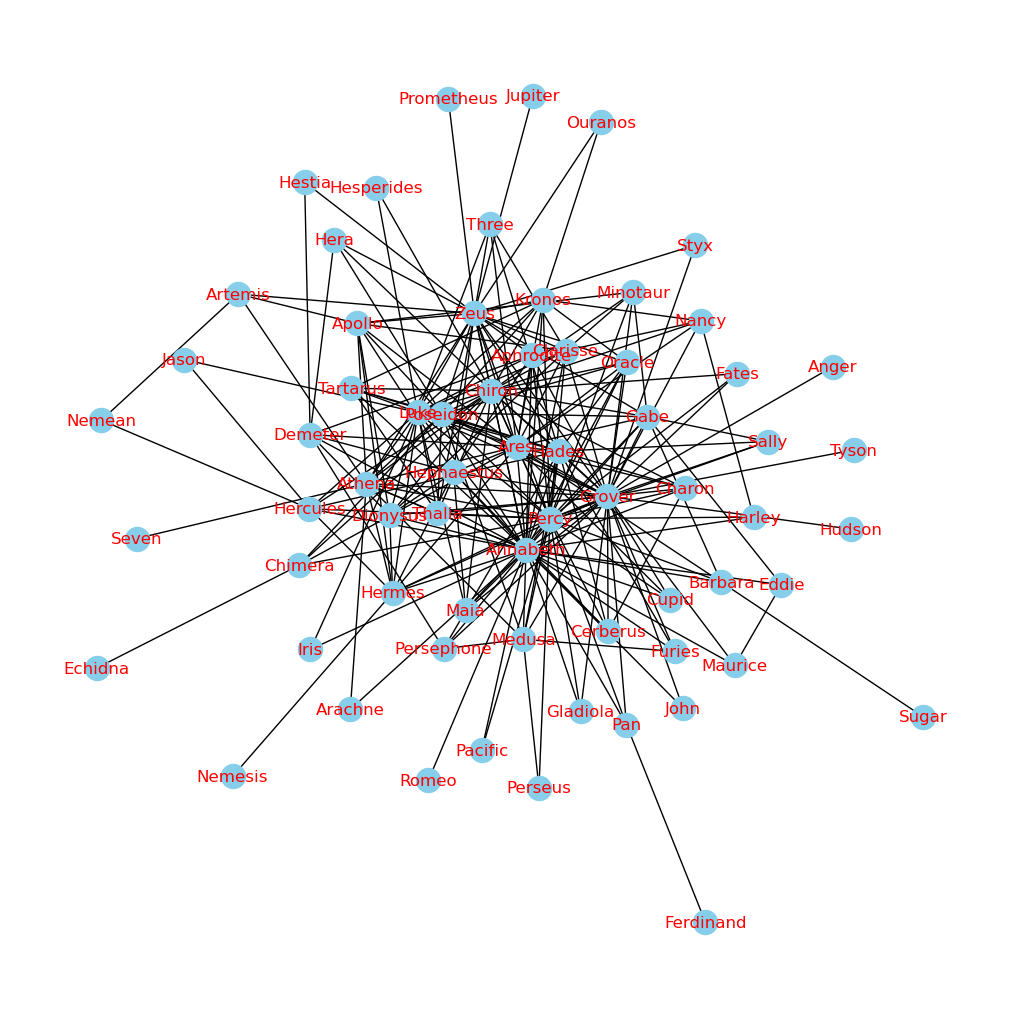

In [23]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(gr)
nx.draw(gr, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, font_size=12, font_color='red')
plt.show()

### graphs with pyvis

In [24]:
cdn_resources='in-line'

In [25]:
from pyvis.network import Network

net = Network(notebook = True, width="1500px", height="1000px", bgcolor='#222222', font_color='white')

node_degree = dict(gr.degree)

#Setting up node size attribute
nx.set_node_attributes(gr, node_degree, 'size')
# Disable physics simulation by setting physics to False
for node in gr.nodes:
    gr.nodes[node]['physics'] = False
for edge in gr.edges:
    gr.edges[edge]['physics'] = False

net.from_nx(gr)
net.show("percyjackson.html")

percyjackson.html


# Visualizing the most important characters

In [26]:
# Degree centrality
degree_dict = nx.degree_centrality(gr)
degree_dict

{'Grover': 0.5538461538461539,
 'Nancy': 0.09230769230769231,
 'Harley': 0.046153846153846156,
 'Kronos': 0.16923076923076924,
 'Zeus': 0.38461538461538464,
 'Tartarus': 0.1076923076923077,
 'Charon': 0.1076923076923077,
 'Chiron': 0.38461538461538464,
 'Percy': 0.49230769230769234,
 'Sally': 0.06153846153846154,
 'Eddie': 0.046153846153846156,
 'Gabe': 0.16923076923076924,
 'Fates': 0.046153846153846156,
 'Anger': 0.015384615384615385,
 'Annabeth': 0.6000000000000001,
 'Styx': 0.03076923076923077,
 'Minotaur': 0.09230769230769231,
 'Apollo': 0.15384615384615385,
 'Aphrodite': 0.12307692307692308,
 'Jupiter': 0.015384615384615385,
 'Prometheus': 0.015384615384615385,
 'Dionysus': 0.13846153846153847,
 'Hercules': 0.12307692307692308,
 'Luke': 0.3384615384615385,
 'Hermes': 0.16923076923076924,
 'Clarisse': 0.18461538461538463,
 'Oracle': 0.13846153846153847,
 'Athena': 0.23076923076923078,
 'Demeter': 0.12307692307692308,
 'Ares': 0.36923076923076925,
 'Poseidon': 0.24615384615384617,


<Axes: >

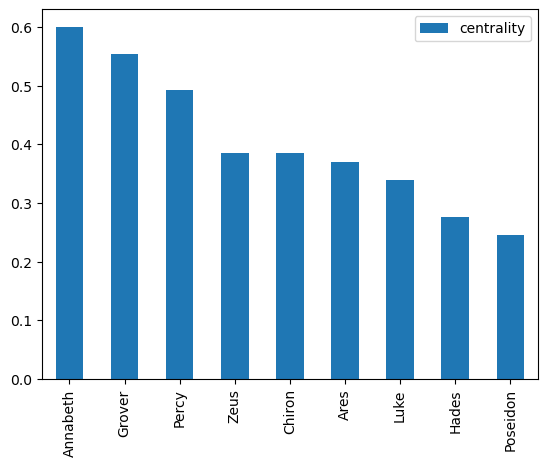

In [27]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

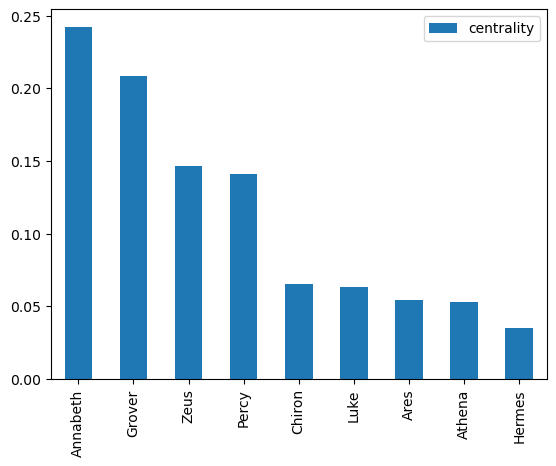

In [28]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(gr)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

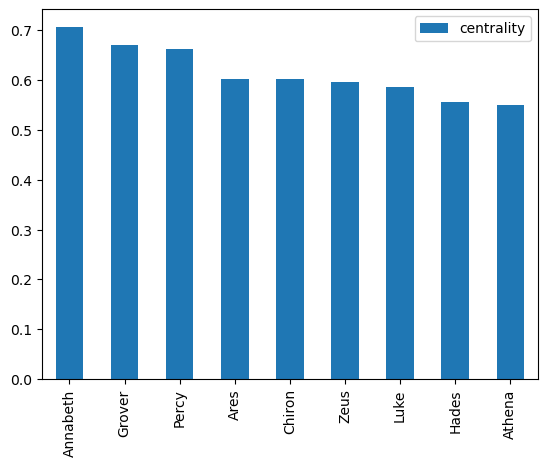

In [29]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(gr)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [30]:
# Save centrality measures
nx.set_node_attributes(gr, degree_dict, 'degree_centrality')
nx.set_node_attributes(gr, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(gr, closeness_dict, 'closeness_centrality')

## Community detection

In [31]:
import community as community_louvain

communities = community_louvain.best_partition(gr)

In [32]:
communities

{'Grover': 3,
 'Nancy': 1,
 'Harley': 1,
 'Kronos': 2,
 'Zeus': 2,
 'Tartarus': 2,
 'Charon': 3,
 'Chiron': 1,
 'Percy': 3,
 'Sally': 3,
 'Eddie': 3,
 'Gabe': 3,
 'Fates': 1,
 'Anger': 3,
 'Annabeth': 3,
 'Styx': 2,
 'Minotaur': 1,
 'Apollo': 4,
 'Aphrodite': 4,
 'Jupiter': 2,
 'Prometheus': 2,
 'Dionysus': 4,
 'Hercules': 1,
 'Luke': 1,
 'Hermes': 4,
 'Clarisse': 1,
 'Oracle': 2,
 'Athena': 4,
 'Demeter': 4,
 'Ares': 4,
 'Poseidon': 2,
 'Three': 1,
 'Hesperides': 1,
 'Hephaestus': 4,
 'Hades': 3,
 'Thalia': 2,
 'Nemesis': 4,
 'Hera': 2,
 'Hestia': 2,
 'Maia': 1,
 'Jason': 1,
 'Furies': 3,
 'Hudson': 3,
 'Medusa': 3,
 'Perseus': 3,
 'Persephone': 3,
 'Ferdinand': 3,
 'Pan': 3,
 'Gladiola': 3,
 'Seven': 4,
 'Chimera': 0,
 'Echidna': 0,
 'John': 3,
 'Artemis': 4,
 'Cupid': 3,
 'Romeo': 3,
 'Arachne': 4,
 'Iris': 1,
 'Maurice': 3,
 'Pacific': 3,
 'Barbara': 3,
 'Sugar': 3,
 'Cerberus': 3,
 'Ouranos': 2,
 'Nemean': 4,
 'Tyson': 3}

In [33]:
nx.set_node_attributes(gr, communities, 'group')

In [34]:
com_net = Network(notebook = True, width="1500px", height="900px", bgcolor='#222222', font_color='white')
com_net.from_nx(gr)
com_net.show("percyjackson_communities.html")

percyjackson_communities.html
